### Al NMR

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the data collected
# This data was organized on a google spreadsheet
data_path = "/home/tylerbiggs/git/pyluminate/data/al_nmr_data.csv"
AlNMRData = pd.read_csv(data_path)
list(AlNMRData)

['Al_concentration',
 'OH_concentration',
 'Al_ppm',
 'counter_ion',
 'temperature']

### Derivative Column Creation

In [3]:
# Filter off the Cs+ counter ions -- there are only three of them
AlNMRData = AlNMRData[(AlNMRData.counter_ion != "Cs+")]

In [4]:
AlNMRData['Al_OH_ratio'] = AlNMRData["Al_concentration"] / AlNMRData["OH_concentration"]

In [5]:
AlNMRData

,Al_concentration,OH_concentration,Al_ppm,counter_ion,temperature,Al_OH_ratio
0,0.005,1.00,80.45,Na+,25,0.005000
1,0.005,5.00,80.40,Na+,25,0.001000
2,0.005,7.00,79.59,Na+,25,0.000714
3,0.005,11.00,78.13,Na+,25,0.000455
4,0.005,13.00,76.93,Na+,25,0.000385
5,0.005,17.00,73.64,Na+,25,0.000294
6,0.005,19.00,71.80,Na+,25,0.000263
7,0.050,2.35,80.23,Na+,25,0.021277
8,0.050,4.02,80.07,Na+,25,0.012438
9,0.050,8.10,79.24,Na+,25,0.006173


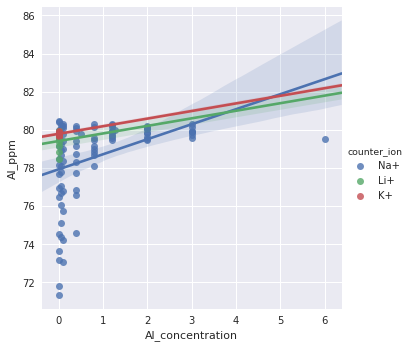

In [64]:
sns.set(style="darkgrid", color_codes=True)

g1 = sns.lmplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
    hue="counter_ion"
)

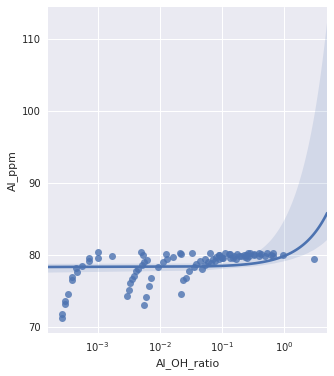

In [61]:
# Setup the figure and axis so that we can control them via the matplotlib interface.
f, ax = plt.subplots(figsize=(5, 6))
ax.set(xscale="log")


g2 = sns.regplot(
    x="Al_OH_ratio",
    y="Al_ppm",
#     color="Al_concentration",
    ax=ax,
    data=AlNMRData[(AlNMRData.counter_ion == "Na+")],
)

#### Interesting pattern observed above. Explore further.

TypeError: regplot() got an unexpected keyword argument 'hue'

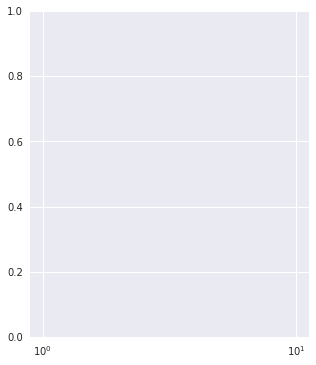

In [73]:
f, ax = plt.subplots(figsize=(5, 6))
ax.set(xscale="log")

sns.regplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    data=AlNMRData,
    ax=ax,
    hue="Al_concentration",
    fit_reg=False
)

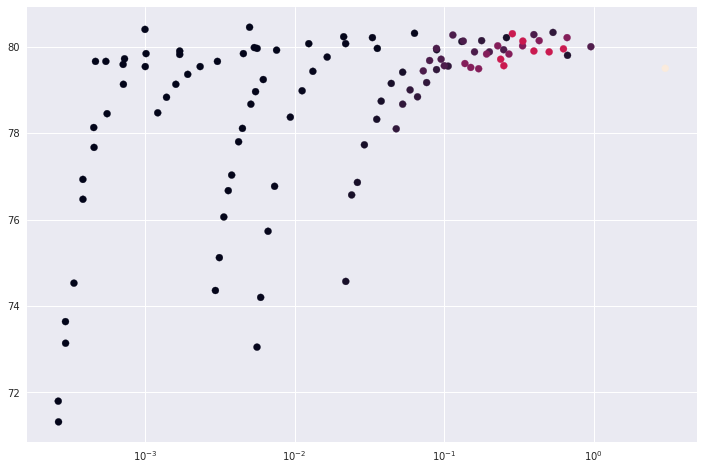

In [55]:
f, ax = plt.subplots(figsize=(12, 8))
ax.set(xscale="log")
plt.scatter(
    x=AlNMRData.Al_OH_ratio,
    y=AlNMRData.Al_ppm,
    c=AlNMRData.Al_concentration,
)

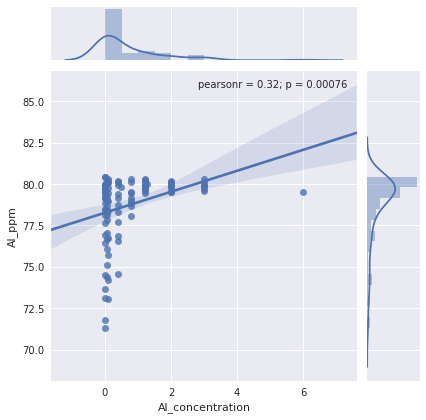

In [18]:
sns.jointplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
#     hue="counter_ion",
    kind="reg",
)

In [ ]:
g = sns.PairGrid(AlNMRData, hue="counter_ion",palette="Set1")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();